In [6]:
import pandas as pd
import numpy as np
import regex as re
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install flashtext

all package installed*

In [7]:
import chardet
with open("dataset.csv","rb") as f:
  char_encoder=chardet.detect(f.read())
char_encoder

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

# New Section

In [8]:
df=pd.read_csv("dataset.csv",engine="python",encoding=char_encoder["encoding"])
df.count()

Disease                         134
Count of Disease Occurrence     134
Symptom                        1865
dtype: int64

In [9]:
df=df.fillna(0)
df.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,0,0.0,UMLS:C0392680_shortness of breath
2,0,0.0,UMLS:C0012833_dizziness
3,0,0.0,UMLS:C0004093_asthenia
4,0,0.0,UMLS:C0085639_fall


In [10]:
fill=df["Disease"].iloc[0]
for i in range(1,1867):
  if df["Disease"].iloc[i]==0:
      df["Disease"].iloc[i]=fill
  else:
      fill=df["Disease"].iloc[i]
  df["Disease"]

<ipython-input-10-e40ac9824859>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Disease"].iloc[i]=fill


In [11]:
fill = df["Count of Disease Occurrence"].iloc[0]
for i in range(1, 1867):
    if df["Count of Disease Occurrence"].iloc[i] == 0.0:
        df["Count of Disease Occurrence"].iloc[i] = fill
    else:
        fill = df["Count of Disease Occurrence"].iloc[i]
df["Count of Disease Occurrence"]

<ipython-input-11-022d03aba957>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Count of Disease Occurrence"].iloc[i] = fill


0       3363.0
1       3363.0
2       3363.0
3       3363.0
4       3363.0
         ...  
1862      45.0
1863      42.0
1864      42.0
1865      42.0
1866      42.0
Name: Count of Disease Occurrence, Length: 1867, dtype: float64

In [12]:
df=df[df.Symptom !=0]
df

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0392680_shortness of breath
2,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0012833_dizziness
3,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0004093_asthenia
4,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0085639_fall
...,...,...,...
1861,UMLS:C0233472_affect labile,45.0,UMLS:C0425251_bedridden^UMLS:C0741453_bedridden
1862,UMLS:C0233472_affect labile,45.0,UMLS:C0242453_prostatism
1863,UMLS:C0011127_decubitus ulcer,42.0,UMLS:C0232257_systolic murmur
1864,UMLS:C0011127_decubitus ulcer,42.0,UMLS:C0871754_frail


In [13]:
df["Symptom"]=df["Symptom"].apply(lambda x:x.split('^'))
df["Symptom"]

<ipython-input-13-2ec0eca5c785>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Symptom"]=df["Symptom"].apply(lambda x:x.split('^'))


0                              [UMLS:C0008031_pain chest]
1                     [UMLS:C0392680_shortness of breath]
2                               [UMLS:C0012833_dizziness]
3                                [UMLS:C0004093_asthenia]
4                                    [UMLS:C0085639_fall]
                              ...                        
1861    [UMLS:C0425251_bedridden, UMLS:C0741453_bedrid...
1862                           [UMLS:C0242453_prostatism]
1863                      [UMLS:C0232257_systolic murmur]
1864                                [UMLS:C0871754_frail]
1865                                [UMLS:C0015967_fever]
Name: Symptom, Length: 1865, dtype: object

In [14]:
df = df.explode("Symptom").reset_index()

In [15]:
df.Symptom = df.Symptom.apply(lambda x: x.split("_")[1] if len(x.split("_")) > 1 else x)
df

,index,Disease,Count of Disease Occurrence,Symptom
0,0,UMLS:C0020538_hypertensive disease,3363.0,pain chest
1,1,UMLS:C0020538_hypertensive disease,3363.0,shortness of breath
2,2,UMLS:C0020538_hypertensive disease,3363.0,dizziness
3,3,UMLS:C0020538_hypertensive disease,3363.0,asthenia
4,4,UMLS:C0020538_hypertensive disease,3363.0,fall
...,...,...,...,...
1902,1861,UMLS:C0233472_affect labile,45.0,bedridden
1903,1862,UMLS:C0233472_affect labile,45.0,prostatism
1904,1863,UMLS:C0011127_decubitus ulcer,42.0,systolic murmur
1905,1864,UMLS:C0011127_decubitus ulcer,42.0,frail


In [16]:
df["Disease"]= df["Disease"].apply(lambda x: x.split("^"))
df=df.explode("Disease").reset_index()
df.Disease=df.Disease.apply(lambda x: x.split("_")[1])
df

,level_0,index,Disease,Count of Disease Occurrence,Symptom
0,0,0,hypertensive disease,3363.0,pain chest
1,1,1,hypertensive disease,3363.0,shortness of breath
2,2,2,hypertensive disease,3363.0,dizziness
3,3,3,hypertensive disease,3363.0,asthenia
4,4,4,hypertensive disease,3363.0,fall
...,...,...,...,...,...
2124,1902,1861,affect labile,45.0,bedridden
2125,1903,1862,affect labile,45.0,prostatism
2126,1904,1863,decubitus ulcer,42.0,systolic murmur
2127,1905,1864,decubitus ulcer,42.0,frail


In [17]:
df.drop(["index", "level_0", "Count of Disease Occurrence"], axis=1, inplace=True)
df

,Disease,Symptom
0,hypertensive disease,pain chest
1,hypertensive disease,shortness of breath
2,hypertensive disease,dizziness
3,hypertensive disease,asthenia
4,hypertensive disease,fall
...,...,...
2124,affect labile,bedridden
2125,affect labile,prostatism
2126,decubitus ulcer,systolic murmur
2127,decubitus ulcer,frail


In [18]:
df_sparse=(pd.get_dummies(df, columns=["Symptom"]).drop("Symptom_",axis=1).drop_duplicates())
df_sparse.head()

,Disease,Symptom_Heberden's node,Symptom_Murphy's sign,Symptom_Stahli's line,Symptom_abdomen acute,Symptom_abdominal bloating,Symptom_abdominal tenderness,Symptom_abnormal sensation,Symptom_abnormally hard consistency,Symptom_abortion,...,Symptom_vision blurred,Symptom_vomiting,Symptom_weepiness,Symptom_weight gain,Symptom_welt,Symptom_wheelchair bound,Symptom_wheezing,Symptom_withdraw,Symptom_worry,Symptom_yellow sputum
0,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_sparse=df_sparse.groupby("Disease").sum().reset_index()
df_sparse.head()

,Disease,Symptom_Heberden's node,Symptom_Murphy's sign,Symptom_Stahli's line,Symptom_abdomen acute,Symptom_abdominal bloating,Symptom_abdominal tenderness,Symptom_abnormal sensation,Symptom_abnormally hard consistency,Symptom_abortion,...,Symptom_vision blurred,Symptom_vomiting,Symptom_weepiness,Symptom_weight gain,Symptom_welt,Symptom_wheelchair bound,Symptom_wheezing,Symptom_withdraw,Symptom_worry,Symptom_yellow sputum
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,HIV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pneumocystis carinii pneumonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accident cerebrovascular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acquired immuno-deficiency syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X=df_sparse[df_sparse.columns[1:]]
Y=df_sparse["Disease"]

Processing data and clean dataset

Trying out our classifier to learn disease from the symtoms

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Training Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
xgb_clf=GradientBoostingClassifier()
xgb_clf.fit(X,Y)
score=xgb_clf.score(X,Y)
print(score)

0.8993288590604027


In [25]:
print("DecisionTree")
clf=DecisionTreeClassifier()
model=clf.fit(X,Y)
print("Accuracy : ",model.score(X,Y))

DecisionTree
Accuracy :  0.8993288590604027


In [26]:
model.predict(x_test)

array(['sepsis (invertebrate)', 'neutropenia', 'failure heart congestive',
       'hypertensive disease', 'affect labile',
       'mitral valve insufficiency', 'tachycardia sinus',
       'carcinoma breast', 'paranoia', 'incontinence', 'confusion',
       'dependence', 'encephalopathy', 'cardiomyopathy',
       'deep vein thrombosis', 'schizophrenia', 'obesity morbid',
       'hernia\xa0hiatal', 'bipolar disorder', 'depression mental',
       'dehydration', 'anemia', 'infection', 'carcinoma of lung',
       'gastritis', 'lymphoma', 'ketoacidosis diabetic', 'cholecystitis',
       'dementia', 'sepsis (invertebrate)'], dtype=object)

In [27]:
model.score(x_test,y_test)

0.9333333333333333

Training model with custom symtoms data


In [28]:
input_data=pd.read_csv("Training.csv")
input_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [29]:
test_data=pd.read_csv("Testing.csv")
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [30]:
input_data.shape

(4920, 133)

In [31]:
input_data.isnull().sum().sort_values(ascending=False)

itching                 0
spinning_movements      0
altered_sensorium       0
muscle_pain             0
irritability            0
                       ..
abdominal_pain          0
constipation            0
back_pain               0
pain_behind_the_eyes    0
prognosis               0
Length: 133, dtype: int64

In [32]:
input_data["prognosis"].value_counts(normalize=True)

Fungal infection                           0.02439
Hepatitis C                                0.02439
Hepatitis E                                0.02439
Alcoholic hepatitis                        0.02439
Tuberculosis                               0.02439
Common Cold                                0.02439
Pneumonia                                  0.02439
Dimorphic hemmorhoids(piles)               0.02439
Heart attack                               0.02439
Varicose veins                             0.02439
Hypothyroidism                             0.02439
Hyperthyroidism                            0.02439
Hypoglycemia                               0.02439
Osteoarthristis                            0.02439
Arthritis                                  0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Acne                                       0.02439
Urinary tract infection                    0.02439
Psoriasis                                  0.02439
Hepatitis D                    

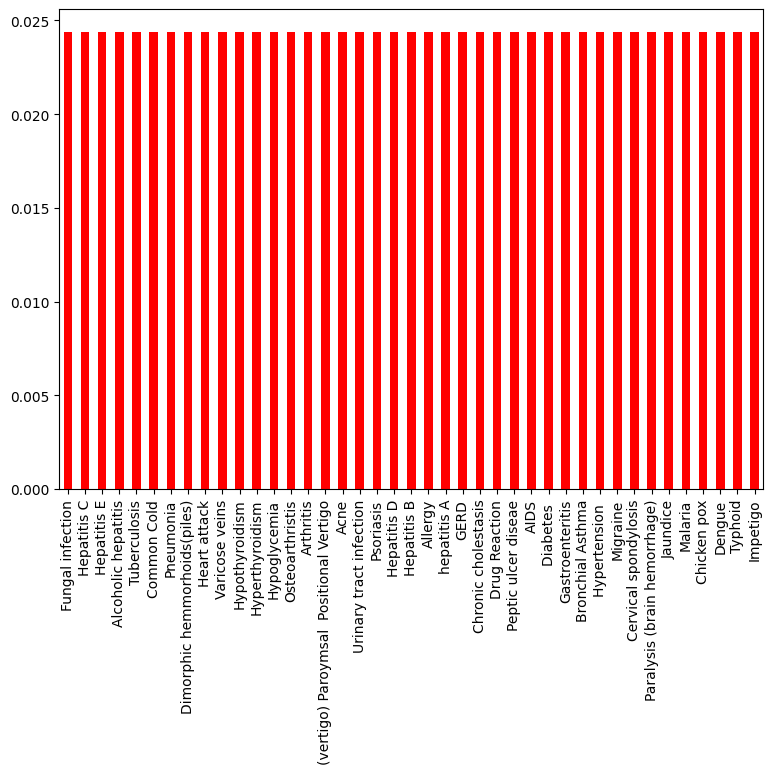

In [33]:
input_data["prognosis"].value_counts(normalize=True).plot.bar(color="red")
plt.subplots_adjust(left=0.9,right=2,top=2,bottom=1)

In [34]:
corr = input_data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

<ipython-input-34-f14ec6beb7cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = input_data.corr()


<Axes: >

In [35]:
pd.crosstab(input_data["cold_hands_and_feets"],input_data["weight_gain"])

weight_gain,0,1
cold_hands_and_feets,,
0,4800,6
1,6,108


In [36]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(input_data["cold_hands_and_feets"],input_data["weight_gain"]))

Chi2ContingencyResult(statistic=4362.40173527245, pvalue=0.0, dof=1, expected_freq=array([[4.69464146e+03, 1.11358537e+02],
       [1.11358537e+02, 2.64146341e+00]]))

Train for custom data

In [37]:
x=input_data.drop(["prognosis"],axis=1)
y=input_data["prognosis"]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

Mulotinomial Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

#fit the model
mnb=MultinomialNB()
mnb=mnb.fit(x_train,y_train)

#get accuracy score
score=mnb.score(x_test,y_test)
print("Accuraccy Score :",score)

Accuraccy Score : 1.0


In [40]:
gmb_clf=GradientBoostingClassifier()
gmb_clf.fit(x_train,y_train)
score=gmb_clf.score(x_train,y_train)
print(score)

1.0


K-FOLD CROSS VALIDATION

In [41]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(mnb,x_test,y_test,cv=3)
print(scores)
print(scores.mean())

[1. 1. 1.]
1.0


In [42]:
scores=cross_val_score(gmb_clf,x_test,y_test,cv=10)
print(scores)
print(scores.mean())

[1.         0.99386503 0.99386503 1.         0.98765432 0.98765432
 0.98148148 0.98765432 0.9691358  1.        ]
0.9901310308263274


In [43]:
real_disease=y_test.values
y_pred=gmb_clf.predict(x_test)
#cross chect to see predicted values and actual values else give wrong prediction
for i in range(0, 20):
    if y_pred[i] == real_disease[i]:
        print("Pred: {0} Actual:{1}".format(y_pred[i], real_disease[i]))
    else:
        print("worng prediction")
        print("Pred: {0} Actual:{1}".format(y_pred[i], real_disease[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis


In [44]:
from sklearn.model_selection import KFold

## Function to run multiple algorithms with different K values of KFold.
def evaluate(train_data, kmax, algo):
    test_scores = {}
    train_scores = {}
    for i in range(2, kmax, 2):
        kf = KFold(n_splits=i)
        sum_train = 0
        sum_test = 0
        data = input_data
        for train, test in kf.split(data):
            train_data = data.iloc[train, :]
            test_data = data.iloc[test, :]
            x_train = train_data.drop(["prognosis"], axis=1)
            y_train = train_data["prognosis"]
            x_test = test_data.drop(["prognosis"], axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train, y_train)
            sum_train += algo_model.score(x_train, y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test, y_pred)
        average_test = sum_test / i
        average_train = sum_train / i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ", i)
    return (train_scores, test_scores)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy")

from sklearn.ensemble import RandomForestClassifier

ran = RandomForestClassifier(n_estimators=10)

In [46]:
algo_dict={"l_o_g": log,"d_t":dt,"r_a_n":ran,"N_B":nb,"G_B":gbm}
algo_train_scores={}
algo_test_scores={}

Gradient Boosted Tree is the most efficient algorithms with K=2

In [47]:
max_kfold=11
for algo_name in algo_dict.keys():
  print(algo_name)
  tr_score,tst_score=evaluate(input_data,max_kfold,algo_dict[algo_name])
  algo_train_scores[algo_name]=tr_score
  algo_test_scores[algo_name]=tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
N_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
G_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'G_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 0.8768292682926829, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 0.9975609756097561, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'G_B': {2: 0.9792682926829268, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


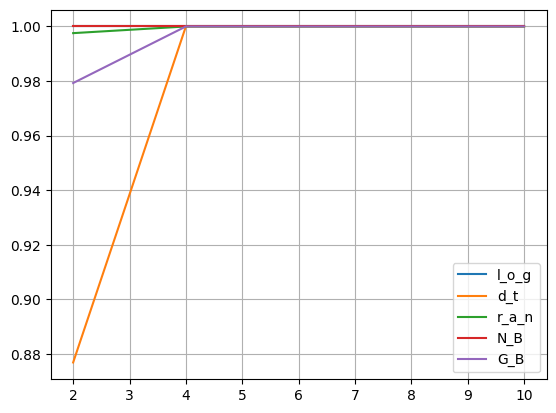

In [48]:
df_test=pd.DataFrame(algo_test_scores)
df_train=pd.DataFrame(algo_train_scores)

df_test.plot(grid=1)
plt.show()

In [49]:
test_scores = {}
train_scores = {}
for i in range(2, 4, 2):
    kf = KFold(n_splits=i)
    sum_train = 0
    sum_test = 0
    data = input_data
    for train, test in kf.split(data):
        train_data = data.iloc[train, :]
        test_data = data.iloc[test, :]
        x_train = train_data.drop(["prognosis"], axis=1)
        y_train = train_data["prognosis"]
        x_test = test_data.drop(["prognosis"], axis=1)
        y_test = test_data["prognosis"]
        algo_model = gbm.fit(x_train, y_train)
        sum_train += gbm.score(x_train, y_train)
        y_pred = gbm.predict(x_test)
        sum_test += accuracy_score(y_test, y_pred)
    average_test = sum_test / i
    average_train = sum_train / i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ", i)

kvalue:  2


In [50]:
print(train_scores)
print(test_scores)

{2: 1.0}
{2: 0.9792682926829268}


model

In [51]:
gbm.__getstate__()

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': None,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'feature_names_in_': array(['itching', 'skin_rash', 'nodal_skin_eruptions',
        'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
        'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
        'vomiting', 'burning_micturition', 'spotting_ urination',
        'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
        'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
        'patches_in_throat', 'irregular_sugar_level', 'cough',
        'high_fever', 'sunken_eyes', 'breat

In [52]:
state_dict=gbm.__getstate__()
classes_array=state_dict["classes_"]
features=state_dict["feature_names_in_"]
classes_list=np.ndarray.tolist(classes_array)

Symthoms similarities matching [Feature Scope]

In [53]:
symptoms=x.columns
regex=re.compile("_")
symptoms=[i if regex.search(i) == None else i.replace("_"," ") for i in symptoms]

In [54]:
# Function to find all close matches of
# input string in given list of possible strings
from difflib import get_close_matches
def closeMatches(patterns, word):
    print(get_close_matches(word, patterns, n=2, cutoff=0.7))

In [55]:
word = 'sivering'
closeMatches(symptoms, word)

['shivering']


In [56]:
from flashtext import KeywordProcessor
keyword_processor = KeywordProcessor()
keyword_processor.add_keywords_from_list(symptoms)

In [57]:
text = 'I have itching, joint pain and fatigue'
keyword_processor.extract_keywords(text)

['itching', 'joint pain', 'fatigue']

In [58]:
def predict_disease(query):
    matched_keyword = keyword_processor.extract_keywords(query)
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(" ")
        processed_keywords = [
            i if regex.search(i) == None else i.replace(" ", "_")
            for i in matched_keyword
        ]
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(np.where(features == keyword)[0][0])
        sample_x = []
        for i in range(len(features)):
            try:
                sample_x.append(i / coded_features[coded_features.index(i)])
            except:
                sample_x.append(i * 0)
        sample_x = np.array(sample_x).reshape(1, len(sample_x))
        probs = gbm.predict_proba(sample_x)[0]
        output = np.column_stack((classes_list, probs))

        filtered_probs = []
        filtered_classes = []

        # Filter the predicted probabilities based on a threshold of 0.2
        threshold = 0.2
        for i in range(len(classes_array)):
            if probs[i] > threshold:
                filtered_probs.append(probs[i])
                filtered_classes.append(classes_array[i])

        filtered_output = np.column_stack((filtered_classes, filtered_probs))

        output = output[np.argsort(output[:,1])[::-1]]
        filtered_output = filtered_output[np.argsort(filtered_output[:,1])[::-1]]

        print("\n Detected Symptoms: \n", processed_keywords)
        print("\n Predicted Disease Probabilities: \n", output)
        print("\n Filtered Diesease: \n", filtered_output)
        print()


Testing models

In [68]:
query = 'I have cough'
predict_disease(query)


 Detected Symptoms: 
 ['cough']

 Predicted Disease Probabilities: 
 [['Chronic cholestasis' '0.11640368676478255']
 ['Fungal infection' '0.031064240086978574']
 ['Chicken pox' '0.030250597950057287']
 ['(vertigo) Paroymsal  Positional Vertigo' '0.03011085499351266']
 ['Gastroenteritis' '0.02988793927546722']
 ['Paralysis (brain hemorrhage)' '0.02972674418603634']
 ['Allergy' '0.029410964617834903']
 ['Bronchial Asthma' '0.02938159660641941']
 ['Drug Reaction' '0.02827883187284237']
 ['AIDS' '0.02765968594708378']
 ['Acne' '0.027659685908119708']
 ['GERD' '0.026930981956051203']
 ['Urinary tract infection' '0.02655090590955356']
 ['Hepatitis D' '0.025432899059305496']
 ['Arthritis' '0.024769719460396227']
 ['Cervical spondylosis' '0.024725651731361487']
 ['Impetigo' '0.024160255350778627']
 ['Dimorphic hemmorhoids(piles)' '0.02370823808263449']
 ['Heart attack' '0.02341426247632648']
 ['Typhoid' '0.023169897677078482']
 ['Varicose veins' '0.022507403185241085']
 ['Migraine' '0.0220803

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [63]:
import pickle

with open("frimpmedimodel.pkl","wb") as f:
  pickle.dump(gbm,f)